# HOMEWORK 2 - CONSTRUCTING AND ANALYZING LAPLACE TRANSFORMS FOR REACTION NETWORKS

**COMMENTS**

8/10. You missed questions (3) and (4). I provided some feedback. Let me know if you need to discuss this more. Thanks for using LaTex; the 2 extra points helped.

In this homework, you will construct a Laplace transform for a reaction network and predict its response to initial conditions.

The reaction network you will analyze is:

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$,
$S_3 \xrightarrow[\text{}]{k_3 S_3} S_2$,

In your computational studies, use $k_1 = 1$, $k_2 = 2$, $k_3 = 2.5$.
The initial conditions for $S_1 = 5$; all other species are initialized to 0.

You should submit your homework as a collab notebook with a separate section for each question.

**Questions**
1. (1 pt) Write Antimony code for the reaction network and simulate it under initial conditions.
1. (5 pt) Find the transfer function $G(s) = \frac{S_3(s)}{S_1 (s)}$. Show steps: (a) construct system equations; (b) convert to Laplace Transforms; and (c) calculate the transfer function.
You will get two points extra credit if you submit your work in LaTex.
1. (1 pt) What are the poles of $G(s)$? Is the system stable? Does it oscillate?
1. (3 pt) We can interpret the simulation in (1) as a response of the transfer function
to the input signal $S_1 (s) = \frac{5}{s + k_1}$. Show that the predicted value of $S_3$ at time
$\infty$ (the "final value") is consistent with the simulation in (1). (Hint: The final value of the Laplace transform $G(s)$
is $lim_{s\rightarrow 0} s G(s)$.) Why is the final value less than the initial value of $S_1$?

# Preliminaries

In [ ]:
!pip install -q tellurium
!pip install -q control

import control
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tellurium as te

     |████████████████████████████████| 121 kB 24.0 MB/s 
     |████████████████████████████████| 54.8 MB 129 kB/s 
     |████████████████████████████████| 6.8 MB 12.4 MB/s 
     |████████████████████████████████| 3.2 MB 7.1 MB/s 
     |████████████████████████████████| 5.6 MB 12.0 MB/s 
     |████████████████████████████████| 5.0 MB 42.4 MB/s 
     |████████████████████████████████| 36.7 MB 1.6 MB/s 
     |████████████████████████████████| 3.3 MB 15.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 2.1 MB 39.9 MB/s 
     |████████████████████████████████| 2.6 MB 43.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 357 kB 27.5 MB/s 


# Helpful Hints

## LaTex Basics

1. All LaTex appears between dollar signs (``$``)
1. Subscripts: $x_2$
1. Superscript: $x^2$
1. Summation: $\sum_{n=0}^{\infty} e^{nt}$
1. Derivatives: $\dot{x}(t)$
1. Bold: ${\bf A}$
1. Fractions: $\frac{a}{b}$

## Steps in Constructing Lapalce Transforms
1. Specify the input and output for the transfer function.
1. Write the system equations.
1. Convert to Laplace transforms.
1. Solve for the output LT in terms of the input LT and form the ratio.

# Q1: Write Antimony Code for the Reaction Network

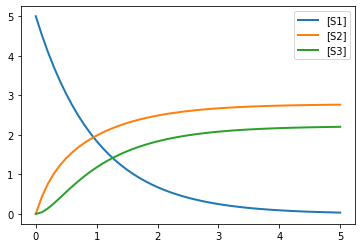

In [ ]:
Model = """
JN1: S1 -> S2; k1*S1
JN2: S2 -> S3; k2*S2
JN3: S3 -> S2; k3*S3

S1 = 5
S2 = 0 
S3 = 0
k1 = 1
k2 = 2
k3 = 2.5

"""
Model_rr = te.loada(Model)
Model_data = Model_rr.simulate()
Model_rr.plot(Model_data)

# Q2: Derive the transfer function $\frac{S_3(s)}{S_1(s)}$

**COMMENTS**

The RHS of the final equation is correct, but the LHS should be S_3(s) / S_1(s) since this is a ratio of Laplace Transforms. But I didn't take points off.

The transfer function $G(s) = \frac{S_3(s)}{S_1 (s)}$

System of equations:
\begin{eqnarray}
\dot{S}_1 & = & -k_1 S_1 \\ 
\dot{S}_2 & = & -k_2 S_2 + k_1 S_1 + k_3 S_3\\
\dot{S}_3 & = & -k_3 S_3 + k_2 S_2  \\
\end{eqnarray}

Conversion to Laplace:

$L[\dot{g}(t)] = s G(s)$,
\\where $L[g(t)] = G(s)$ therefore...

\begin{eqnarray}
sS_1(s) & = & -k_1 S_1(s) \\ 
sS_2(s) & = & -k_2 S_2(s) + k_1 S_1(s) + k_3 S_3(s)\\
sS_3(s) & = & -k_3 S_3(s) + k_2 S_2(s)  \\
\end{eqnarray}

Calculation:
\begin{eqnarray}
S_2 (s) & = & \frac{k_1 S_1 + k_3 S_3}{s + k_2} \\
S_3 (s) & = & \frac{k_2 S_2}{s+k_3} \\
\end{eqnarray}

Substitute $S_2$ into $S_3$:

\begin{eqnarray}
S_3 & = & k_2 \frac{ \frac{k_1 S_1(s) + k_3 S_3}{s+k_2} }{s+k_3} \\
\frac{S_3}{S_1} & = & \frac{k_1 k_2}{s^2+(k_2+k_3)s} \\
\end{eqnarray}


# Q3: Poles of the Transfer Function

The poles of the transfer fuction are $-k_2$ and $-k_3$

**COMMENTS**

The poles are the zeroes of the denominator of S_3(s) / S_1(s). It should be 0, -(k_2 + k_3)

# Q4: Response to the Input Signal

### Transfer function

In [ ]:
k1 = 1
k2 = 2
k3 = 2.5
Time = np.linspace(0,5,50)# do forced input,
tf_S3S1 = control.TransferFunction([k1*k2], [1, k2+k3 , 0])
input_S1 = [5,0]

### Reaction Network

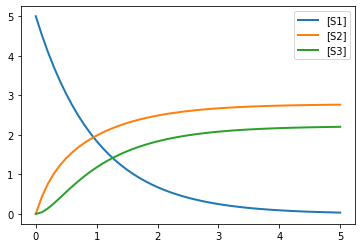

In [ ]:
Model_impulse_response = """
JN1: S1 -> S2; k1*S1
JN2: S2 -> S3; k2*S2
JN3: S3 -> S2; k3*S3

S1 = 5
S2 = 0 
S3 = 0
k1 = 1
k2 = 2
k3 = 2.5

"""
Model_impulse_response_rr = te.loada(Model_impulse_response)
Model_impulse_response_data = Model_impulse_response_rr.simulate()
Model_impulse_response_rr.plot(Model_impulse_response_data)

### Function

**COMMENTS**

The intent here is to apply the final value theorem for the input signal provided in the question. That is, multiply S3(s)/S1(s) times 5/(s + k1) and take the limit as s goes to 0.


/usr/local/lib/python3.7/dist-packages/control/timeresp.py:924: UserWarning:

Non-zero initial condition given for transfer function system. Internal conversion to state space used; may not be consistent with given X0.



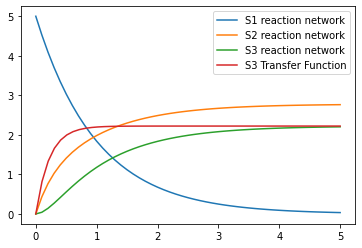

The final value of the transfer function is 2.203


In [ ]:
def showfinalvalue(Model_impulse_response,Transfer_fuction,Time,input):
  """
  Plots the transfer function output of the reaction network of the three 
  species system. Both are overlayed and it prints out the final value of the transfer funtion

  Parameters
  ----------
  Model: Reaction network
  Time: evenly spaced numbers over a specified interval to repersent time
  Transfer funtion: transfer function written with the control function
  Input for Transfer funtion: Vector
  
  Returns
  -------
  A plot 
  The final value of the transfer function S3

  """

  result = control.forced_response(Transfer_fuction,Time,X0=input)
  Model_impulse_response_rr = te.loada(Model)
  Model_impulse_response_data = Model_impulse_response_rr.simulate()
  plt.plot(Model_impulse_response_data[:,0],Model_impulse_response_data[:,1:])
  plt.plot(result.t.flatten(),result.outputs.flatten())
  plt.legend(['S1 reaction network','S2 reaction network', 'S3 reaction network', 'S3 Transfer Function'])
  plt.show()
  Final_value = Model_impulse_response_data[:,-1][-1]

  return  print("The final value of the transfer function is " + str(round(Final_value,3)) )

  # Test
showfinalvalue(Model_impulse_response,tf_S3S1,Time,input_S1)

The final value less than the initial value of $S_1$ because a parotion of the mass of $S_3$ is converted into back into $S_2$.